In [3]:
# Action : Import dataset to notebook (training and test data)

import pandas as pd
training_data = pd.read_csv('training_data.csv', parse_dates=['date_id'])
test_data = pd.read_csv('test_data.csv', parse_dates=['date_id'])

In [4]:
# Action : Sneak peak on the training dataset
print(training_data.shape)
training_data.head(5)

(614098, 7)


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2021-11-01,Grocery,1.0,160.0,XYZ,16620,1475459.0
1,2021-11-01,Grocery,2.0,480.0,XYZ,32365,1475459.0
2,2021-11-01,Grocery,1.0,127.0,XYZ,31349,1475459.0
3,2021-11-01,Household,2.0,110.0,XYZ,1266,1475475.0
4,2021-11-01,Household,1.0,150.0,XYZ,114920,1475475.0


In [5]:
# Action : Sneak peak on the training dataset
print(test_data.shape)
test_data.head(5)

(247624, 7)


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2022-02-01,Beverages,2.0,480.0,XYZ,112360,1495518.0
1,2022-02-01,Beverages,1.0,202.0,XYZ,111195,1495518.0
2,2022-02-01,Household,1.0,165.0,XYZ,41212,1495572.0
3,2022-02-01,Household,2.0,480.0,XYZ,123476,1495572.0
4,2022-02-01,Grocery,2.0,660.0,XYZ,106668,1495572.0


In [6]:
# Action : Check for null values in both dataset

print(training_data.isnull().sum())
print(test_data.isnull().sum())

# No null values found

date_id            0
item_dept          0
item_qty           0
net_sales          0
store              0
item               0
invoice_num    22810
dtype: int64
date_id           0
item_dept         0
item_qty          0
net_sales         0
store             0
item              0
invoice_num    8305
dtype: int64


In [7]:
# Action : Descriptive analysis on dataset (training dataset only)
# 1. Inspect the dataset
print(training_data.info())
print(training_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614098 entries, 0 to 614097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date_id      614098 non-null  datetime64[ns]
 1   item_dept    614098 non-null  object        
 2   item_qty     614098 non-null  float64       
 3   net_sales    614098 non-null  float64       
 4   store        614098 non-null  object        
 5   item         614098 non-null  int64         
 6   invoice_num  591288 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 32.8+ MB
None
                             date_id       item_qty      net_sales  \
count                         614098  614098.000000  614098.000000   
mean   2021-12-16 16:21:54.693094912       1.533792     335.067969   
min              2021-11-01 00:00:00     -59.000000  -15250.000000   
25%              2021-11-25 00:00:00       1.000000     124.000000   
50%

In [9]:
# Action : Filtering the Training Data for Positive Sales and Quantity

df = training_data[(training_data['net_sales'] > 0) & (training_data['item_qty'] > 0)].reset_index(drop=True)
print(df.shape)
df.head(10)

(613106, 7)


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2021-11-01,Grocery,1.0,160.0,XYZ,16620,1475459.0
1,2021-11-01,Grocery,2.0,480.0,XYZ,32365,1475459.0
2,2021-11-01,Grocery,1.0,127.0,XYZ,31349,1475459.0
3,2021-11-01,Household,2.0,110.0,XYZ,1266,1475475.0
4,2021-11-01,Household,1.0,150.0,XYZ,114920,1475475.0
5,2021-11-01,Household,1.0,745.0,XYZ,115596,1475475.0
6,2021-11-01,Grocery,1.0,175.0,XYZ,98654,1475475.0
7,2021-11-01,Grocery,3.0,120.0,XYZ,8373,1475475.0
8,2021-11-01,Grocery,1.0,194.0,XYZ,106669,1475521.0
9,2021-11-01,Household,1.0,137.0,XYZ,75008,1475521.0


In [10]:
# 2. Summary statistics for item_qty and net_sales
summary_stats = df[['item_qty', 'net_sales']].describe()
print(summary_stats)

            item_qty      net_sales
count  613106.000000  613106.000000
mean        1.538344     336.436393
std         3.054628     823.619962
min         0.002000       0.009000
25%         1.000000     125.000000
50%         1.000000     216.000000
75%         1.712000     371.000000
max       880.000000  316880.280000


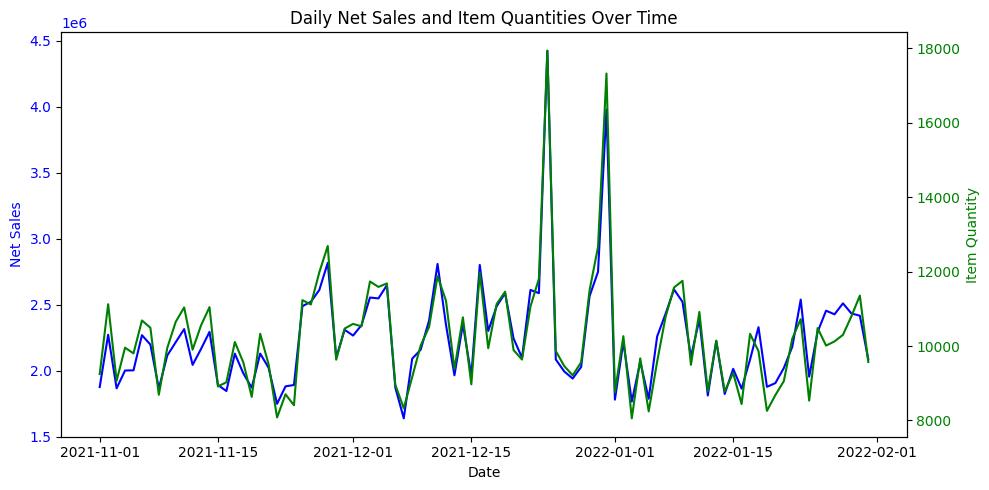

In [11]:
# 3. Time-Based Analysis
# Aggregate sales and quantities by date
daily_sales = df.groupby('date_id').agg({'item_qty': 'sum', 'net_sales': 'sum'}).reset_index()

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot net sales with the first y-axis
ax1.plot(daily_sales['date_id'], daily_sales['net_sales'], label='Net Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Net Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(daily_sales['date_id'], daily_sales['item_qty'], label='Item Quantity', color='green')
ax2.set_ylabel('Item Quantity', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legends
plt.title('Daily Net Sales and Item Quantities Over Time')
fig.tight_layout()  # To ensure there's no overlap of labels

plt.show()

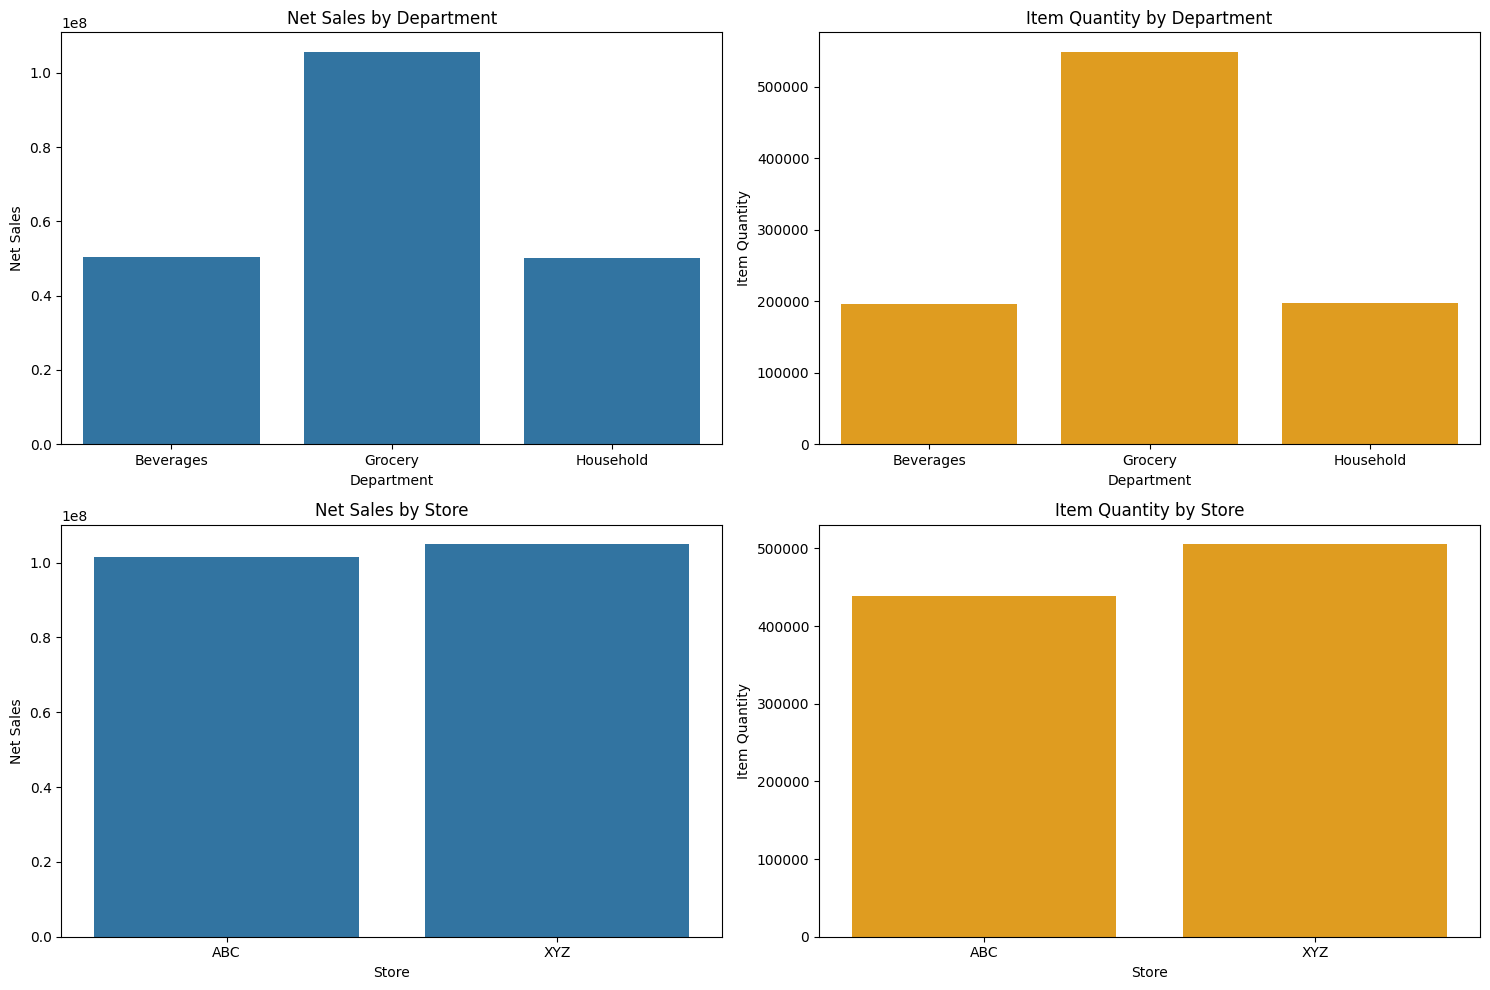

In [13]:
import seaborn as sns

# Department Analysis
dept_sales = df.groupby('item_dept').agg({'item_qty': 'sum', 'net_sales': 'sum'}).reset_index()

# Store-Level Analysis
store_sales = df.groupby('store').agg({'item_qty': 'sum', 'net_sales': 'sum'}).reset_index()

# Create subplots - 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Net Sales by Department
sns.barplot(x='item_dept', y='net_sales', data=dept_sales, ax=axes[0, 0])
axes[0, 0].set_title('Net Sales by Department')
axes[0, 0].set_xlabel('Department')
axes[0, 0].set_ylabel('Net Sales')

# Item Quantity by Department
sns.barplot(x='item_dept', y='item_qty', data=dept_sales, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Item Quantity by Department')
axes[0, 1].set_xlabel('Department')
axes[0, 1].set_ylabel('Item Quantity')

# Net Sales by Store
sns.barplot(x='store', y='net_sales', data=store_sales, ax=axes[1, 0])
axes[1, 0].set_title('Net Sales by Store')
axes[1, 0].set_xlabel('Store')
axes[1, 0].set_ylabel('Net Sales')

# Item Quantity by Store
sns.barplot(x='store', y='item_qty', data=store_sales, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Item Quantity by Store')
axes[1, 1].set_xlabel('Store')
axes[1, 1].set_ylabel('Item Quantity')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-14-ed076c75a348>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_per_item_qty', y='item', data=top_items_sales, palette='viridis')


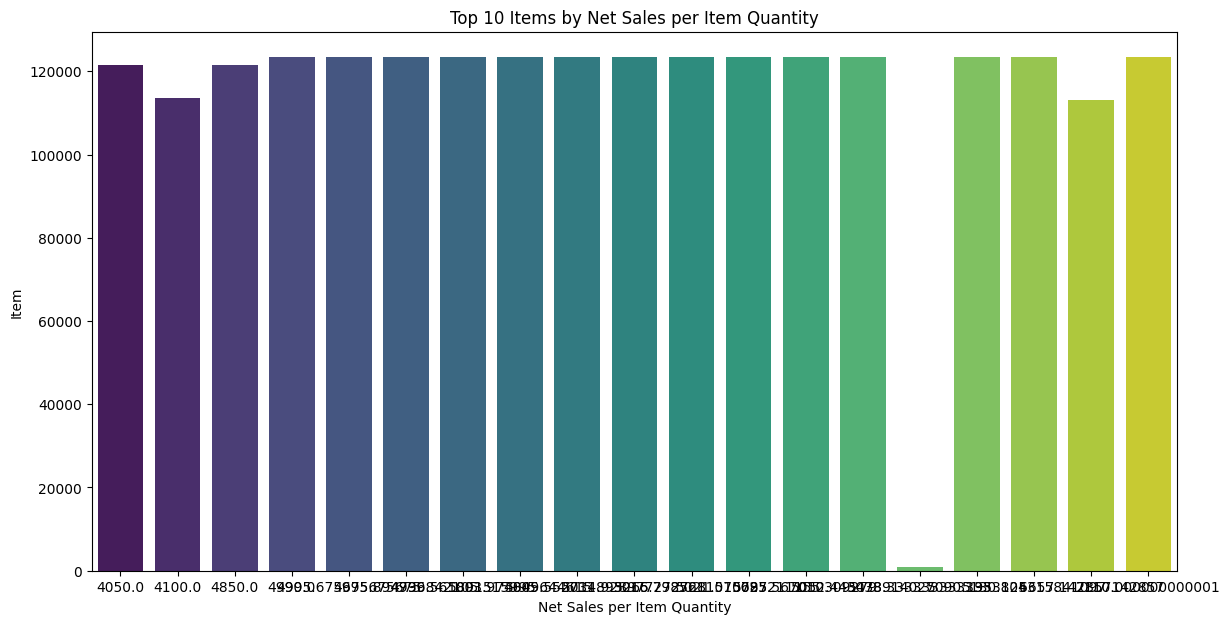

In [14]:
# 6. Item-Level Analysis
item_sales = df.groupby('item').agg({'item_qty': 'sum', 'net_sales': 'sum'}).reset_index()

# Calculate net sales per item quantity
item_sales['sales_per_item_qty'] = item_sales['net_sales'] / item_sales['item_qty']

# Sort by the new metric and select the top 10 items
top_items_sales = item_sales.sort_values(by='sales_per_item_qty', ascending=False).head(20)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='sales_per_item_qty', y='item', data=top_items_sales, palette='viridis')
plt.title('Top 10 Items by Net Sales per Item Quantity')
plt.xlabel('Net Sales per Item Quantity')
plt.ylabel('Item')
plt.show()

In [15]:
print(df.shape)
df.head(10)

(613106, 7)


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2021-11-01,Grocery,1.0,160.0,XYZ,16620,1475459.0
1,2021-11-01,Grocery,2.0,480.0,XYZ,32365,1475459.0
2,2021-11-01,Grocery,1.0,127.0,XYZ,31349,1475459.0
3,2021-11-01,Household,2.0,110.0,XYZ,1266,1475475.0
4,2021-11-01,Household,1.0,150.0,XYZ,114920,1475475.0
5,2021-11-01,Household,1.0,745.0,XYZ,115596,1475475.0
6,2021-11-01,Grocery,1.0,175.0,XYZ,98654,1475475.0
7,2021-11-01,Grocery,3.0,120.0,XYZ,8373,1475475.0
8,2021-11-01,Grocery,1.0,194.0,XYZ,106669,1475521.0
9,2021-11-01,Household,1.0,137.0,XYZ,75008,1475521.0
